In [1]:
#General
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
%matplotlib inline

In [3]:
data1=pd.read_csv("D://Download/train.csv")
data2=pd.read_csv("D://Download/test.csv")
full=data1.append(data2, ignore_index=True, sort=False)
titanic=full[:891]

In [4]:
# survived by class and sex

titanic.groupby(["Pclass", "Sex"])["Survived"].agg(["mean", "count", "size"])
titanic.groupby(["Pclass", "Sex"])["Survived"].count()

Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
Name: Survived, dtype: int64

In [5]:
titanic.groupby(["Pclass", "Sex"])["Survived"].value_counts(normalize=True)



Pclass  Sex     Survived
1       female  1.0         0.968085
                0.0         0.031915
        male    0.0         0.631148
                1.0         0.368852
2       female  1.0         0.921053
                0.0         0.078947
        male    0.0         0.842593
                1.0         0.157407
3       female  0.0         0.500000
                1.0         0.500000
        male    0.0         0.864553
                1.0         0.135447
Name: Survived, dtype: float64

In [6]:
type(titanic)

pandas.core.frame.DataFrame

In [7]:
describe_fields=["Age", "Fare", "Pclass", "SibSp", "Parch"]
titanic[titanic["Sex"]=="male"][describe_fields].describe()

,Age,Fare,Pclass,SibSp,Parch
count,453.000000,577.000000,577.000000,577.000000,577.000000
mean,30.726645,25.523893,2.389948,0.429809,0.235702
std,14.678201,43.138263,0.813580,1.061811,0.612294
min,0.420000,0.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,2.000000,0.000000,0.000000
50%,29.000000,10.500000,3.000000,0.000000,0.000000
75%,39.000000,26.550000,3.000000,0.000000,0.000000
max,80.000000,512.329200,3.000000,8.000000,5.000000


In [8]:
titanic[titanic["Sex"]=="female"][describe_fields].describe()

,Age,Fare,Pclass,SibSp,Parch
count,261.000000,314.000000,314.000000,314.000000,314.000000
mean,27.915709,44.479818,2.159236,0.694268,0.649682
std,14.110146,57.997698,0.857290,1.156520,1.022846
min,0.750000,6.750000,1.000000,0.000000,0.000000
25%,18.000000,12.071875,1.000000,0.000000,0.000000
50%,27.000000,23.000000,2.000000,0.000000,0.000000
75%,37.000000,55.000000,3.000000,1.000000,1.000000
max,63.000000,512.329200,3.000000,8.000000,6.000000


In [15]:
plt.figure(figsize=(6,4))
mybars=plt.bar(x=[0,1], titanic.groupby(["Survived"]).size(), align="center",  edgecolor="dimgrey", color="skyblue")
plt.xticks(x, ("dead", "survived"))
plt.title("Survived distribution")

# удаляет обводки фигуры
for spine in plt.gca().spines.values():
    spine.set_visible(False)
# удаляет все деления на осях, кроме нижних
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')
# подписывает бары
for bari in mybars:
    height = bari.get_height()
    plt.gca().text(bari.get_x() + bari.get_width()/2, bari.get_height()-25, str(int(height)),
                 ha='center', color='black', fontsize=10)
    


SyntaxError: positional argument follows keyword argument (<ipython-input-15-3362a61e6e11>, line 2)

In [10]:
def bar_plot(x, y, color="teal", edgecolor="dimgrey", title=None, color1="white"):
    position = np.arange(len(x))
    plt.figure(figsize=(6,4))
    mybars=plt.bar(position, y, align="center",  edgecolor=edgecolor, color=color)
    plt.xticks(position, x)
    plt.title(title)
    # удаляет обводки фигуры
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
# удаляет все деления на осях, кроме нижних
    plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')
# подписывает бары
    for bari in mybars:
        height = bari.get_height()
        plt.gca().text(bari.get_x() + bari.get_width()/2, bari.get_height()-25, str(int(height)),
                 ha='center', color=color1, fontsize=10)
    

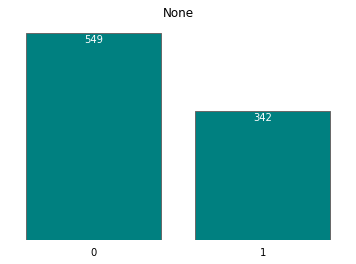

In [12]:
bar_plot(np.arange(2), titanic.groupby(["Survived"]).size())

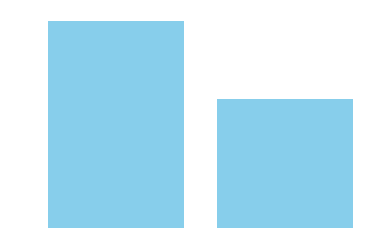

In [19]:
fig, ax=plt.subplots()
ax.axis('off')
ax.yaxis.set_ticks_position ('left') 
ax.xaxis.set_ticks_position ('bottom')
mybars=plt.bar(np.arange(2), titanic.groupby(["Survived"]).size(), align="center", color="skyblue")
plt.set_cmap("hot")

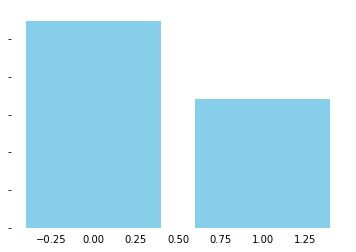

In [20]:
fig, ax=plt.subplots()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
mybars=plt.bar(np.arange(2), titanic.groupby(["Survived"]).size(), align="center", color="skyblue")
plt.tick_params(top='off', bottom='off', left='on', right='off', labelleft='off', labelbottom='on')

In [ ]:
#xvals = list('ABCDE')
#yvals = np.array(range(1, 6))

#position = np.arange(len(xvals))

#mybars = plt.bar(position, yvals, align='center', linewidth=0)

In [21]:
t1=titanic.groupby("Pclass")["PassengerId"].agg("count").reset_index("Pclass")

In [22]:
t1

,Pclass,PassengerId
0,1,216
1,2,184
2,3,491


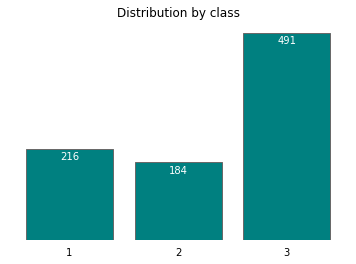

In [23]:
bar_plot(t1.iloc[:,0], t1.iloc[:,1], title="Distribution by class")

In [24]:
t2=titanic.groupby("Sex")["PassengerId"].agg("count").reset_index()

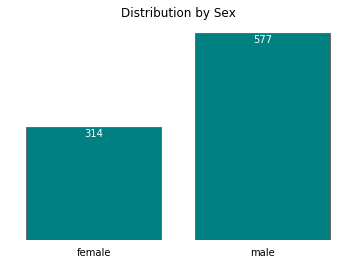

In [25]:
bar_plot(t2.iloc[:,0], t2.iloc[:,1], title="Distribution by Sex")

In [26]:
t3=titanic.groupby("Age")["PassengerId"].agg("count").reset_index()

(array([0.00776705, 0.00638007, 0.030236  , 0.03245516, 0.02052719,
        0.01276015, 0.00804444, 0.00443831, 0.00249655, 0.00055479]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

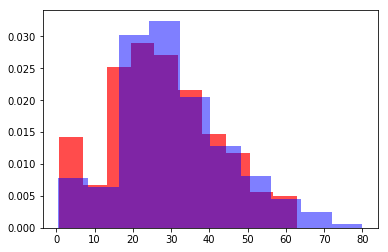

In [27]:
plt.hist(titanic["Age"][titanic["Sex"]=="female"].dropna(), bins=10, color="red", alpha=0.7, normed=True)
plt.hist(titanic["Age"][titanic["Sex"]=="male"].dropna(), bins=10, color="blue", alpha=0.5, normed=True)

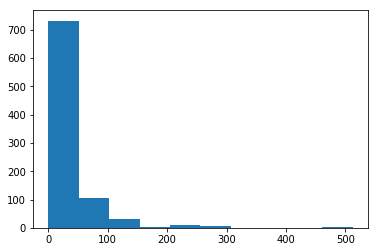

In [28]:
mm=plt.hist(titanic["Fare"].dropna())

In [29]:

plt.gcf()

In [30]:
full["Embarked"].fillna("S", inplace=True)

In [31]:
t4=titanic.groupby(["Pclass", 'Survived']).agg("size")

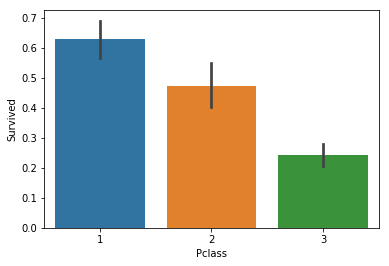

In [32]:
sns.barplot("Pclass", "Survived", data=titanic)


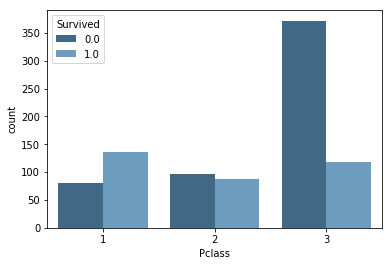

In [33]:
sns.countplot(titanic["Pclass"], data=titanic[["Survived", "Pclass"]], hue='Survived', palette="Blues_d")

In [34]:
table=pd.DataFrame.pivot_table(titanic, index="Pclass", columns='Survived',  aggfunc="count")
print(table)

          Age      Cabin      Embarked      Fare      Name      Parch       \
Survived  0.0  1.0   0.0  1.0      0.0  1.0  0.0  1.0  0.0  1.0   0.0  1.0   
Pclass                                                                       
1          64  122    59  117       80  134   80  136   80  136    80  136   
2          90   83     3   13       97   87   97   87   97   87    97   87   
3         270   85     6    6      372  119  372  119  372  119   372  119   

         PassengerId       Sex      SibSp      Ticket       
Survived         0.0  1.0  0.0  1.0   0.0  1.0    0.0  1.0  
Pclass                                                      
1                 80  136   80  136    80  136     80  136  
2                 97   87   97   87    97   87     97   87  
3                372  119  372  119   372  119    372  119  


In [35]:
t5=titanic.groupby(["Pclass"])["Survived"].value_counts(normalize=True)

In [36]:
print(t5)
print(t5.shape)

Pclass  Survived
1       1.0         0.629630
        0.0         0.370370
2       0.0         0.527174
        1.0         0.472826
3       0.0         0.757637
        1.0         0.242363
Name: Survived, dtype: float64
(6,)


In [37]:
t5.index


MultiIndex(levels=[[1, 2, 3], [0.0, 1.0]],
           labels=[[0, 0, 1, 1, 2, 2], [1, 0, 0, 1, 0, 1]],
           names=['Pclass', 'Survived'])

In [38]:
print(t5.unstack(level=0))

Pclass          1         2         3
Survived                             
0.0       0.37037  0.527174  0.757637
1.0       0.62963  0.472826  0.242363


In [39]:
t6=t5.unstack(level=0)

In [40]:
t6.unstack(level=0)

Pclass  Survived
1       0.0         0.370370
        1.0         0.629630
2       0.0         0.527174
        1.0         0.472826
3       0.0         0.757637
        1.0         0.242363
dtype: float64

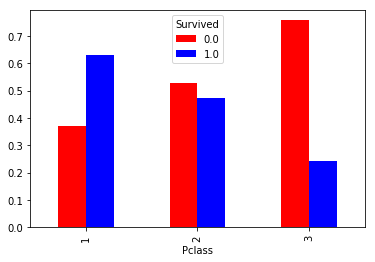

In [41]:
t5.unstack().plot(kind='bar', stacked=False, color=["r", "b"])

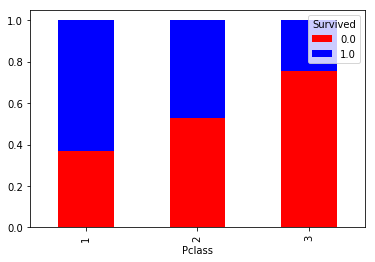

In [42]:
t5.unstack().plot(kind='bar', stacked=True, color=["r", "b"])


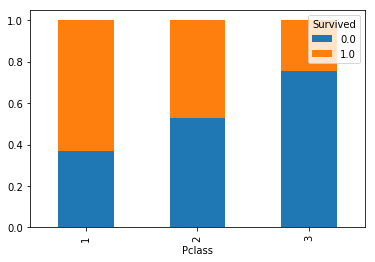

In [43]:
s=titanic.groupby(['Pclass', 'Survived']).size()
s.div(s.sum(level=0),level=0).unstack().plot(kind='bar', stacked=True)

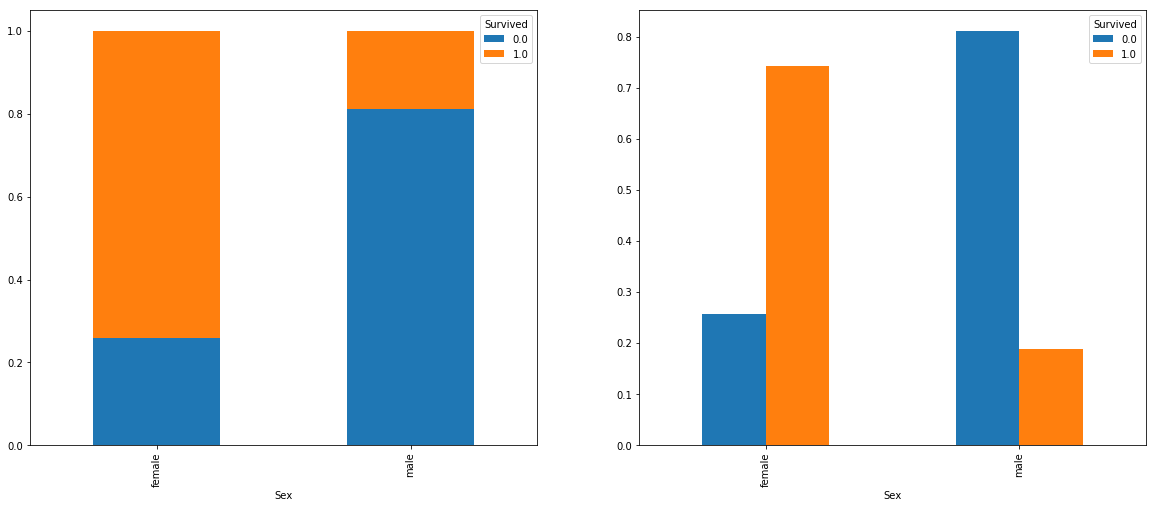

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=False)
titanic.groupby("Sex")["Survived"].value_counts(normalize=True).unstack().plot(kind="bar", stacked=True, ax=axes[0])

titanic.groupby("Sex")["Survived"].value_counts(normalize=True).unstack().plot(kind="bar", stacked=False, ax=axes[1])

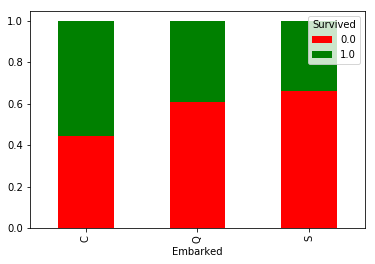

In [45]:

titanic.groupby("Embarked")["Survived"].value_counts(normalize=True).unstack().plot(kind="bar", stacked=True, color=["r", "g"])

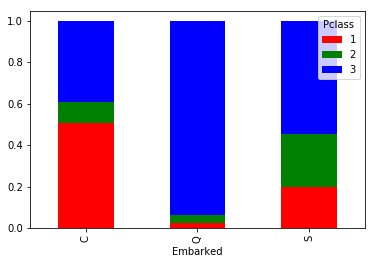

In [46]:
titanic.groupby("Embarked")["Pclass"].value_counts(normalize=True).unstack().plot(kind="bar", stacked=True, color=["r", "g", "b"])

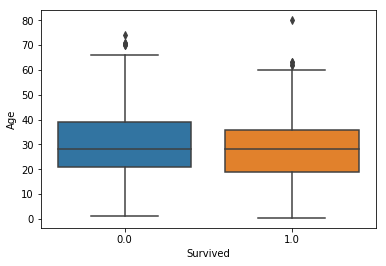

In [47]:
sns.boxplot(data=titanic, x="Survived", y="Age")

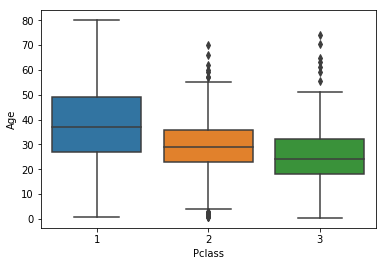

In [48]:
sns.boxplot(data=titanic, x="Pclass", y="Age")

In [49]:
titanic["Name"].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [50]:
import re
def get_title(row):
    mask=re.search(' ([A-Za-z]+)\.', row["Name"])
    if mask:
        return mask.group(1)
    else:
        return 0
    

In [51]:
full['Title'] = full.apply(lambda row: get_title(row), axis=1)




In [52]:
full.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs


In [53]:
#print (full["Title"])
full.pivot_table(values="PassengerId", index="Title", columns="Sex", aggfunc="count", fill_value=0)

Sex,female,male
Title,,
Capt,0,1
Col,0,4
Countess,1,0
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2


In [54]:
titles_dict={"Master": "Master", "Mr": "Mr", "Capt":"Arist", "Col":"Arist", "Don":"Arist", "Jonkheer":"Arist", "Major":"Arist", "Sir":"Arist", "Rev":"Arist", \
            "Mrs": "Mrs", "Countess": "Arist", "Dona": "Arist", 'Lady': "Arist", 'Mme': "Mrs", "Miss":"Miss", "Mlle":"Miss", "Ms":"Miss", "Dr":"Arist"}

In [55]:

tab=full.groupby(["Title"])["Age"].agg(["mean", "count", "size"])
tab["na"]=tab["size"]-tab["count"]
print(tab.loc["Capt"]["mean"])

70.0


In [56]:
def fill_age(row):
    if np.isnan(row["Age"]):
        return round(tab.loc[row["Title"]]["mean"],2)
    else:
        return round(row["Age"],2)
    
        

In [57]:
print (tab)

               mean  count  size   na
Title                                
Capt      70.000000      1     1    0
Col       54.000000      4     4    0
Countess  33.000000      1     1    0
Don       40.000000      1     1    0
Dona      39.000000      1     1    0
Dr        43.571429      7     8    1
Jonkheer  38.000000      1     1    0
Lady      48.000000      1     1    0
Major     48.500000      2     2    0
Master     5.482642     53    61    8
Miss      21.774238    210   260   50
Mlle      24.000000      2     2    0
Mme       24.000000      1     1    0
Mr        32.252151    581   757  176
Mrs       36.994118    170   197   27
Ms        28.000000      1     2    1
Rev       41.250000      8     8    0
Sir       49.000000      1     1    0


In [58]:
full["Age"]=full.apply(lambda row: fill_age(row), axis=1 )

In [59]:
full.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S,Mr
5,6,0.0,3,"Moran, Mr. James",male,32.25,0,0,330877,8.4583,NaN,Q,Mr
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S,Mr
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S,Master
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S,Mrs
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C,Mrs


In [60]:
def get_title(name):
    if pd.isnull(name):
        return "Null"

    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1).lower()
    else:
        return "None"


data_digest = pd.Index(full["Name"].apply(get_title).unique())

In [61]:
data_digest

Index(['mr', 'mrs', 'miss', 'master', 'don', 'rev', 'dr', 'mme', 'ms', 'major',
       'lady', 'sir', 'mlle', 'col', 'capt', 'countess', 'jonkheer', 'dona'],
      dtype='object')

In [62]:
full["Title"]=full["Title"].apply(lambda x: titles_dict[x] )

In [63]:
titles_dict.values()

dict_values(['Master', 'Mr', 'Arist', 'Arist', 'Arist', 'Arist', 'Arist', 'Arist', 'Arist', 'Mrs', 'Arist', 'Arist', 'Arist', 'Mrs', 'Miss', 'Miss', 'Miss', 'Arist'])

In [64]:
#inv_dict={value: key for key, value in titles_dict.items()}
#inv_map = {titles_dict[k] : k for k in titles_dict}
def invert_dict(d):
    inv={}
    for key in d.keys():
        val=d[key]
        if val not in inv:
            inv[val] = [key]
        else:
            inv[val].append(key)
    return inv
        
        
        


In [66]:
full["Cabin"].fillna("U", inplace=True)


full["Cabin"]=full["Cabin"].apply(lambda x:  x[0])


In [67]:
full["Cabin"].unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [68]:
#full.groupby("Pclass")["Fare"].mean()

df1=full[full['Fare']!=0].groupby("Pclass")["Fare"].mean()
df1

Pclass
1    89.447482
2    21.648108
3    13.378473
Name: Fare, dtype: float64

In [72]:
def fares(row): 
   
    if row['Fare']==0.0 :
        return df1.loc[row["Pclass"]]
    else:
        return row["Fare"]

In [73]:
full["Fare"].fillna(13.37, inplace=True)
full["Fare"]=full.apply( lambda row: fares(row), axis=1)
#s1=full[(full["Pclass"]==1) & (full["Fare"]==0)]
#s1["Fare"].apply(lambda x: 89.44)

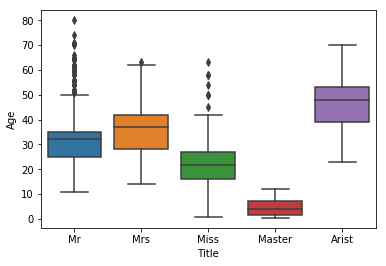

In [75]:
sns.boxplot(data=full[:891], x="Title", y="Age")

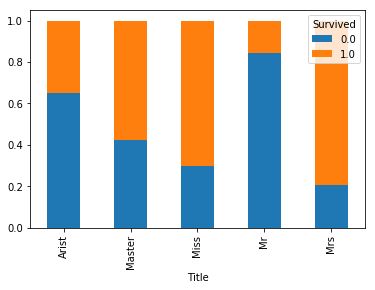

In [76]:
full[:891].groupby("Title")['Survived'].value_counts(normalize=True).unstack().plot(kind="bar", stacked=True)

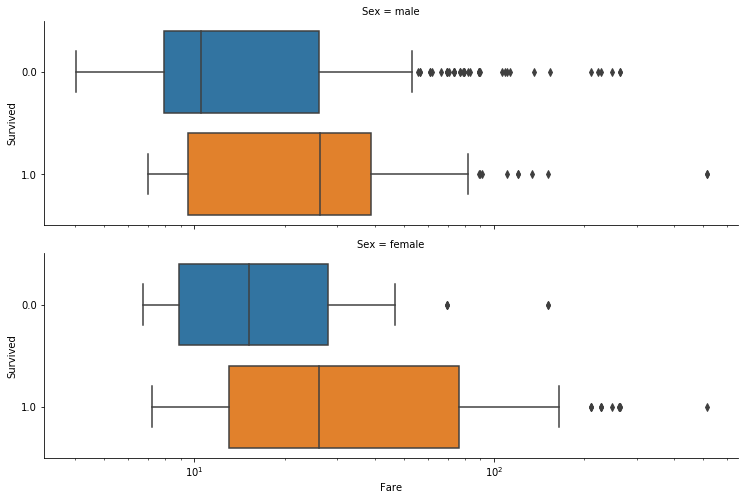

In [120]:
titanic=full[:891]
g=sns.catplot(data=titanic, x="Fare", y="Survived", row="Sex",  kind="box" , orient='h', height=3.5, aspect=3     )


#plt.xticks([.0, 20.,40.,60.,80.])
#plt.xlim(0,100)
#plt.yticks([1,2,3])
#sns.axes_style()

#g = sns.catplot(x="fare", y="survived", row="class",
        #        kind="box", orient="h", height=1.5, aspect=4,
         #       data=titanic.query("fare > 0"))
g.set(xscale="log");

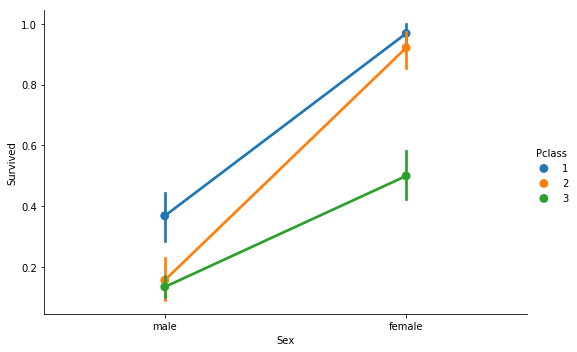

In [124]:
sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="point", data=titanic, aspect=1.5)

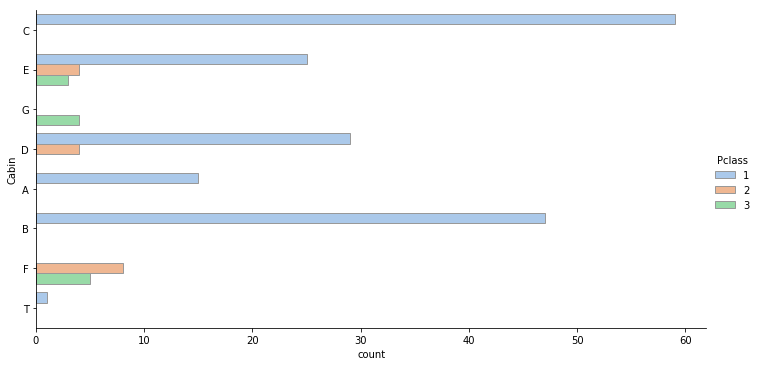

In [131]:
sns.catplot(y="Cabin", hue="Pclass", kind="count",
            palette="pastel", edgecolor=".6",
            data=titanic[titanic["Cabin"]!="U"], aspect=2);


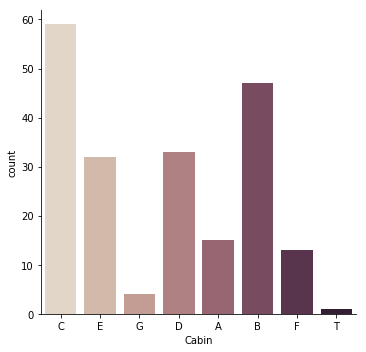

In [130]:
sns.catplot(x="Cabin", kind="count", palette="ch:.25", data=titanic[titanic["Cabin"]!="U"]);

In [146]:
full["Family"]=full["SibSp"]+full["Parch"]+1
full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,Mr,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,Miss,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,Mr,1


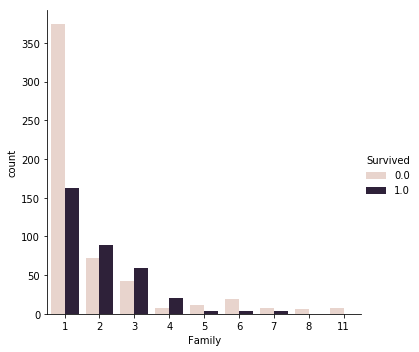

In [154]:
titanic=full[:891]
sns.catplot(kind="count", x="Family", data=titanic, hue="Survived", palette="ch:.05")

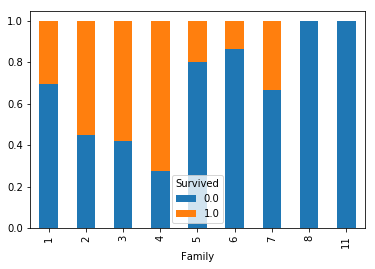

In [158]:
titanic.groupby("Family")["Survived"].value_counts(normalize=True).unstack().plot(kind="bar", stacked=True)

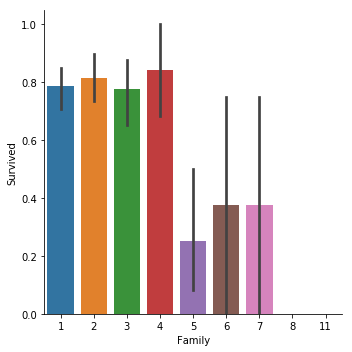

In [217]:
sns.catplot(data=titanic[titanic["Sex"]=='female'], x="Family",y="Survived"  , kind="bar")

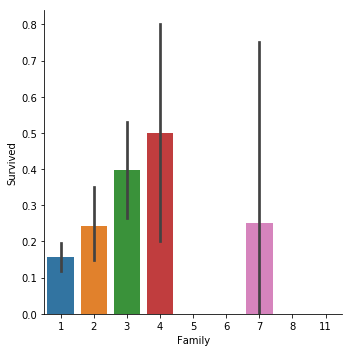

In [218]:
sns.catplot(data=titanic[titanic["Sex"]=='male'], x="Family",y="Survived"  , kind="bar")

In [259]:
full["isFamily"]=full["Family"].map(lambda x: 1 if x>1 else 0)
full["hasCabin"]=full["Cabin"].map(lambda x: 0 if x=="U" else 1)

In [260]:
full.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family,isFamily,hasCabin
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,U,S,Mr,2,1,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C,C,Mrs,2,1,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,U,S,Miss,1,0,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C,S,Mrs,2,1,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,U,S,Mr,1,0,0
5,6,0.0,3,"Moran, Mr. James",male,32.25,0,0,330877,8.4583,U,Q,Mr,1,0,0
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E,S,Mr,1,0,1
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,U,S,Master,5,1,0
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,U,S,Mrs,3,1,0
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,U,C,Mrs,2,1,0


In [224]:
use_axis=["Survived", "Pclass", "Sex", "Age", "Fare", "Cabin", "Embarked", "Title", "Family", "isFamily", "hasCabin"]

In [261]:
full_model=full[use_axis]
#full_model.head()
#sex=full_model["Sex"].map(lambda x: 1 if x=='male' else 0)
full_model.drop("Sex", 1, inplace=True)

C:\Users\Admin\Miniconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [262]:
full_model["Sex"]=sex
full_model.head()

C:\Users\Admin\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Survived,Pclass,Age,Fare,Cabin,Embarked,Title,Family,isFamily,hasCabin,Sex
0,0.0,3,22.0,7.2500,U,S,Mr,2,1,0,1
1,1.0,1,38.0,71.2833,C,C,Mrs,2,1,1,0
2,1.0,3,26.0,7.9250,U,S,Miss,1,0,0,0
3,1.0,1,35.0,53.1000,C,S,Mrs,2,1,1,0
4,0.0,3,35.0,8.0500,U,S,Mr,1,0,0,1


In [241]:
embarked=pd.get_dummies(full_model["Embarked"], prefix="Embarked")
titles=pd.get_dummies(full_model["Title"], prefix="Title")
cabins=pd.get_dummies(full_model["Cabin"], prefix="Cabin")
classes=pd.get_dummies(full_model["Pclass"], prefix="Pclass")

In [263]:
full_model=full_model.drop(["Pclass", "Cabin", "Embarked", "Title"],1 )

In [264]:
full_model=pd.concat([full_model, embarked, titles, cabins, classes], axis=1)

In [265]:
full_model.head()

,Survived,Age,Fare,Family,isFamily,hasCabin,Sex,Embarked_C,Embarked_Q,Embarked_S,...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3
0,0.0,22.0,7.2500,2,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
1,1.0,38.0,71.2833,2,1,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
2,1.0,26.0,7.9250,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,1.0,35.0,53.1000,2,1,1,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0.0,35.0,8.0500,1,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1


In [251]:
from sklearn import model_selection, metrics
from sklearn.preprocessing import  StandardScaler

#Modelling
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier, AdaBoostClassifier
import xgboost as xgb

In [269]:
#scaler=StandardScaler()
#scale_axis=["Age", "Fare"]
#scaled_age_fare=scaler.fit_transform(full_model[scale_axis])
#full_model=full_model.drop(scale_axis, 1)
full_model["Age"]=scaled_age_fare[:, 0]
full_model["Fare"]=scaled_age_fare[:, 1]

In [270]:
full_model.head()

,Survived,Family,isFamily,hasCabin,Sex,Embarked_C,Embarked_Q,Embarked_S,Title_Arist,Title_Master,...,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3,Age,Fare
0,0.0,2,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,-0.598716,-0.514851
1,1.0,2,1,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0.614435,0.722267
2,1.0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,-0.295428,-0.501810
3,1.0,2,1,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0.386969,0.370968
4,0.0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0.386969,-0.499395


In [304]:
full_X=full_model[:891]
y=full_model.Survived
full_X=full_X.drop('Survived', 1)
test_kaggle=full_model[891:]
full_model.shape

(1309, 27)

In [277]:
#test_kaggle=test_kaggle.drop("Survived",1)
test_kaggle.head()

,Family,isFamily,hasCabin,Sex,Embarked_C,Embarked_Q,Embarked_S,Title_Arist,Title_Master,Title_Miss,...,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3,Age,Fare
891,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0.349058,-0.503660
892,2,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,1.296833,-0.519681
893,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,2.434162,-0.467758
894,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,-0.219606,-0.487561
895,3,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,-0.598716,-0.417526


In [279]:
y=y[:891]
train_X, test_X, train_y, test_y=model_selection.train_test_split(full_X, y, test_size=0.3)

In [283]:
def print_accuracy(model):
    model.fit(train_X, train_y)
    return model.score(train_X, train_y), model.score(test_X, test_y)
classifiers_list=[RandomForestClassifier(n_estimators=100),
                  LogisticRegression(),
                  KNeighborsClassifier(n_neighbors=7),
                  GradientBoostingClassifier(),
                  GaussianNB(),
                  SVC(),
                  AdaBoostClassifier(),
                  xgb.XGBClassifier(),
                 ExtraTreeClassifier()]
log=pd.DataFrame(columns=["Classifier", "F1 score", "Accuracy", "ROC"])

In [285]:
scoring={"Accuracy":"accuracy",
        "F1 score": "f1",
        "ROC": "roc_auc"}
for clf in classifiers_list:
    cvs=model_selection.cross_validate(clf, train_X, train_y, cv=10, scoring=scoring, n_jobs=-1)
    log_entry=pd.DataFrame([[clf.__class__.__name__, cvs["test_F1 score"].mean(), cvs["test_Accuracy"].mean(), cvs["test_ROC"].mean() ]],
                           columns=["Classifier", "F1 score", "Accuracy", "ROC"])
    log=log.append(log_entry, ignore_index=True)
log=log.sort_values("F1 score", ascending=False).reset_index(drop=True)
log

,Classifier,F1 score,Accuracy,ROC
0,XGBClassifier,0.801541,0.849245,0.886232
1,GradientBoostingClassifier,0.794688,0.846096,0.884552
2,SVC,0.789598,0.846123,0.860769
3,LogisticRegression,0.787388,0.838082,0.871351
4,AdaBoostClassifier,0.784551,0.833267,0.872337
5,KNeighborsClassifier,0.772102,0.828455,0.866799
6,RandomForestClassifier,0.763404,0.813963,0.878550
7,ExtraTreeClassifier,0.721693,0.778784,0.770417
8,GaussianNB,0.622941,0.748134,0.830538


In [286]:
train_X1=train_X.drop("Sex", 1)

In [289]:
log1=pd.DataFrame(columns=["Classifier", "F1 score", "Accuracy", "ROC"])
for clf in classifiers_list:
    cvs=model_selection.cross_validate(clf, train_X1, train_y, cv=10, scoring=scoring, n_jobs=-1)
    log_entry=pd.DataFrame([[clf.__class__.__name__, cvs["test_F1 score"].mean(), cvs["test_Accuracy"].mean(), cvs["test_ROC"].mean() ]],
                           columns=["Classifier", "F1 score", "Accuracy", "ROC"])
    log1=log1.append(log_entry, ignore_index=True)

log1=log1.sort_values("F1 score", ascending=False).reset_index(drop=True)
log1

,Classifier,F1 score,Accuracy,ROC
0,GradientBoostingClassifier,0.794197,0.844457,0.886326
1,XGBClassifier,0.792626,0.839668,0.888136
2,LogisticRegression,0.788541,0.838082,0.870907
3,AdaBoostClassifier,0.786873,0.834880,0.875781
4,SVC,0.776222,0.833245,0.862808
5,RandomForestClassifier,0.775278,0.823589,0.879444
6,KNeighborsClassifier,0.752433,0.812296,0.857964
7,ExtraTreeClassifier,0.748565,0.799522,0.792324
8,GaussianNB,0.571732,0.720735,0.824812


In [290]:
from scipy import stats
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.model_selection import learning_curve

In [291]:
import warnings
warnings.filterwarnings(module='sklearn*', action='ignore', category=DeprecationWarning)
from sklearn.metrics import f1_score, accuracy_score
f1=make_scorer(f1_score)
xgboost=xgb.XGBClassifier()
#xgboost.get_params().keys()
params={"learning_rate":[ 0.01, 0.02, 0.05],
        "max_depth": [ 3, 5, 6, 7 ],
        "n_estimators": [50, 110,200]}
cvgrid=GridSearchCV(xgboost, param_grid=params, scoring=f1, cv=10, verbose=0)
cvgrid.fit(train_X, train_y)

GridSearchCV(cv=10, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.01, 0.02, 0.05], 'max_depth': [3, 5, 6, 7], 'n_estimators': [50, 110, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(f1_score), verbose=0)

In [294]:
cvgrid.best_params_

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}

In [295]:
print(cvgrid.best_estimator_.score(train_X, train_y), cvgrid.best_estimator_.score(test_X, test_y))

0.8908507223113965 0.8059701492537313


In [296]:
xgboost=xgb.XGBClassifier()
xgboost.fit(train_X, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [299]:
preds=xgboost.predict(test_X)
metrics.accuracy_score(test_y, preds)

0.8097014925373134

In [307]:
result=pd.DataFrame(data2["PassengerId"])
result.shape
test_kaggle.head()

,Survived,Family,isFamily,hasCabin,Sex,Embarked_C,Embarked_Q,Embarked_S,Title_Arist,Title_Master,...,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3,Age,Fare
891,NaN,1,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0.349058,-0.503660
892,NaN,2,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,1.296833,-0.519681
893,NaN,1,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,1,0,2.434162,-0.467758
894,NaN,1,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,-0.219606,-0.487561
895,NaN,3,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,-0.598716,-0.417526


In [308]:
test_kaggle=test_kaggle.drop("Survived",1)

In [309]:
test_kaggle.shape

(418, 26)

In [316]:
from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import chi2, f_classif

C:\Users\Admin\Miniconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [19] are constant.
  UserWarning)
C:\Users\Admin\Miniconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


array([5.329e-03, 3.708e+01, 9.204e+01, ..., 7.781e+01, 3.934e+00,
       3.825e+01])

In [328]:
full_model=full_model.drop(["Cabin_G", "Cabin_T"],1)

In [330]:
full_X=full_model[:891]
y=full_model.Survived[:891]
full_X=full_X.drop('Survived', 1)
test_kaggle=full_model[891:].drop('Survived', 1)


In [331]:
from sklearn.utils import shuffle
full_X, y=shuffle(full_X, y)
train_X, test_X, train_y, test_y=model_selection.train_test_split(full_X, y, test_size=0.3)

In [401]:
test=SelectKBest(f_classif, 8)
fit=test.fit(train_X, train_y)
np.set_printoptions(3)
#D={train_X.columns.values: fit.scores_}
type(fit.scores_)
result=pd.DataFrame(fit.scores_, index=train_X.columns.values, columns=[ "Importance"])
#print (*zip(train_X.columns.values, fit.scores_), sep="\n")
result=result.sort_values("Importance", ascending=False)
result

,Importance
Title_Mr,292.481950
Sex,276.707689
Title_Miss,82.884258
Title_Mrs,82.189766
Pclass_3,66.558692
hasCabin,62.569561
Cabin_U,62.569561
Pclass_1,59.617904
Fare,47.402997
isFamily,34.915405


In [384]:
log_reg_all=LogisticRegression()
cv=model_selection.cross_validate(log_reg_all, train_X, train_y, cv=10, scoring=scoring, n_jobs=-1)


In [385]:
print(*zip([ "F1 score", "Accuracy", "ROC"], 
           [  cv["test_F1 score"].mean(), cv["test_Accuracy"].mean(), cv["test_ROC"].mean() ]))

('F1 score', 0.7762547691640131) ('Accuracy', 0.8296412413017384) ('ROC', 0.8641792318634423)


In [423]:
log_reg_all.fit(train_X, train_y).score(test_X, test_y)

0.8470149253731343

In [426]:
res1=result.drop(result[result.Importance<20].index, 0)
res1
selected_features=res1.index.values
selected_features

array(['Title_Mr', 'Sex', 'Title_Miss', ..., 'Pclass_1', 'Fare',
       'isFamily'], dtype=object)

In [427]:
train_X_selected=train_X[selected_features]


In [428]:
cv1=model_selection.cross_validate(log_reg_all, train_X_selected, train_y, cv=10, scoring=scoring, n_jobs=-1)
print(*zip([ "F1 score", "Accuracy", "ROC"], 
           [  cv1["test_F1 score"].mean(), cv1["test_Accuracy"].mean(), cv1["test_ROC"].mean() ]))

('F1 score', 0.7237247058061052) ('Accuracy', 0.7862645110926444) ('ROC', 0.8467259364627786)


In [429]:
log_reg_all.fit(train_X_selected, train_y).score(test_X[selected_features], test_y)

0.7910447761194029

In [430]:
res1=result.drop(result[result.Importance<3].index, 0)

selected_features=res1.index.values

train_X_selected1=train_X[selected_features]
cv2=model_selection.cross_validate(log_reg_all, train_X_selected1, train_y, cv=10, scoring=scoring, n_jobs=-1)
print(*zip([ "F1 score", "Accuracy", "ROC"], 
           [  cv2["test_F1 score"].mean(), cv2["test_Accuracy"].mean(), cv2["test_ROC"].mean() ]))

('F1 score', 0.7606663592798811) ('Accuracy', 0.8104895369041323) ('ROC', 0.8605120910384068)


In [432]:
log_reg_all.fit(train_X_selected1, train_y).score(test_X[selected_features], test_y)

0.8171641791044776

In [409]:
log_reg_all.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [434]:
params={"penalty": ["l1", "l2"],
       "C": [0.01, 0.05, 1, 2],
       "max_iter": [100,200,500]}
grid=model_selection.GridSearchCV(log_reg_all, param_grid=params, cv=10, scoring=scoring, n_jobs=-1, refit="Accuracy" )
grid.fit(train_X, train_y)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.01, 0.05, 1, 2], 'max_iter': [100, 200, 500]},
       pre_dispatch='2*n_jobs', refit='Accuracy',
       return_train_score='warn',
       scoring={'Accuracy': 'accuracy', 'F1 score': 'f1', 'ROC': 'roc_auc'},
       verbose=0)

In [435]:
grid.best_estimator_.score(test_X, test_y)

0.8395522388059702

In [436]:
grid.best_score_

0.8330658105939005

In [438]:
grid.best_params_

{'C': 1, 'max_iter': 100, 'penalty': 'l1'}

In [446]:
grid.best_estimator_.coef_.shape

(1, 24)

In [447]:
print(*zip(train_X.columns.values, grid.best_estimator_.coef_.T), sep="\n")

('Family', array([-0.493]))
('isFamily', array([0.532]))
('hasCabin', array([0.531]))
('Sex', array([-2.473]))
('Embarked_C', array([0.399]))
('Embarked_Q', array([0.315]))
('Embarked_S', array([0.]))
('Title_Arist', array([0.]))
('Title_Master', array([2.573]))
('Title_Miss', array([0.]))
('Title_Mr', array([-0.326]))
('Title_Mrs', array([0.534]))
('Cabin_A', array([0.]))
('Cabin_B', array([0.]))
('Cabin_C', array([0.]))
('Cabin_D', array([0.]))
('Cabin_E', array([0.606]))
('Cabin_F', array([0.]))
('Cabin_U', array([0.]))
('Pclass_1', array([1.417]))
('Pclass_2', array([0.694]))
('Pclass_3', array([-0.]))
('Age', array([-0.338]))
('Fare', array([0.054]))


In [448]:
result1=pd.DataFrame(data2["PassengerId"])

test_kaggle.head()

,Family,isFamily,hasCabin,Sex,Embarked_C,Embarked_Q,Embarked_S,Title_Arist,Title_Master,Title_Miss,...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_U,Pclass_1,Pclass_2,Pclass_3,Age,Fare
891,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0.349058,-0.503660
892,2,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,1.296833,-0.519681
893,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,2.434162,-0.467758
894,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,-0.219606,-0.487561
895,3,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,-0.598716,-0.417526


In [452]:
test_kaggle.shape

(418, 24)

In [454]:
result1.shape

(418, 1)

In [455]:
answers=grid.best_estimator_.predict(test_kaggle)
result1["Survived"]=answers.astype(int)
result1.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [457]:
result1.to_csv("Titanic_result_v4.csv", index=False)